# Lectura de sensores de un robot siguendo la pared

<!-- # Sensor readings from a wall-following robot -->
 <!-- The data were collected as the SCITOS G5 robot navigates through the room following the wall in a clockwise direction, for 4 rounds, using 24 ultrasound sensors arranged circularly around its 'waist'. -->

Los [datos](https://www.kaggle.com/uciml/wall-following-robot) se toman de los sensores del robot SCITOS G5, cuando navega siguiendo una pared en dirección de las manecillas del reloj. Se hacen 4 pasadas, usando los 24 sensores ultrasonido arreglados circularmente en el contorno del chasis del robot.

![robot](images/mobile-robots-scitos_g5-1.jpg)


<!-- Dado que los datos son series de tiempo, se busca tratar cada instancia independiente -->



In [2]:
# Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')


In [3]:
# Version de Pandas
pd.__version__
import os
print(os.listdir("."))

['P01-bases_datos.ipynb', 'Data', 'P02-Preproceso.ipynb']


# Detalles de los datos

El conjunto de datos se construye de la medición de los 24 sensores instalados en el robot. los cuales estan ubicados cada $15^\circ$ entre sensores adyacentes;  así como también la dirección de movimiento del robot en cada muestra. La dirección  de movimiento se divide en 4 clases: hacia adelante (**move forward**), giro a la derecha leve (**slight right-turn**), giro brusco a la derecha (**sharp right-turn**) y giro a la izquierda leve (**slight left-turn**). 

Los datos se recolectaron con una taza de 9 muestras por segundo, para un total de $5456$.

Los datos además de las medidas de los 24 sensores, también presenta dos versiones simplificadas de los datos, una con 4 sensores y otra con 2 sensores.

La version de 4 sensores se construye apartir de los 24 sensores, tomando la lectura del sensor con distancia minima en un arco de 60 grados para cada dirección, frente, izquierda, derecha y trasera del robot. La version de 2 sensores se construye a partir de la version de 4, incluyendo solo el sensor de la izquierda y el frente.

<!-- Mas sensores puede incorporar mas ruido,  -->


<!-- Slight right -> meaning that the road changes directly slightly, perhaps less than 15 degrees, and you should follow the road to the right. -->


In [4]:
# import data
df = pd.read_csv("Data/robot_wall_follower/sensor_readings_4.csv",header=None,
                 names=["sd_front", "sd_left", "sd_right", "sd_back","target"])
#df.columns
#df.index
# df.feature_names = ["sd_front","sd_left","sd_right","sd_back"]


In [5]:
#rename columns
# dic_names ={ 
#     "sd_front" : "new_name",
#     "sd_left"  : "new_name2",
#    ...
# }
# df.rename(columns=dic_names).head()

In [6]:
# df.head()
# df.dtypes ## Name and type of each column
# df.dtypes.value_counts() ## return the count of each data type
df.sample(n=5, random_state=42) ## visualiza columnas aleatorias
# df.value_counts

,sd_front,sd_left,sd_right,sd_back,target
5149,0.667,0.539,0.982,1.338,Sharp-Right-Turn
3196,1.480,0.644,2.027,0.998,Move-Forward
2406,1.265,0.650,2.941,0.980,Move-Forward
4588,0.828,0.566,0.901,1.290,Sharp-Right-Turn
3184,2.647,0.688,2.718,0.950,Move-Forward


In [7]:
df.describe()

,sd_front,sd_left,sd_right,sd_back
count,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.290307,0.681269,1.881819,1.273689
std,0.626700,0.342594,0.562533,0.821750
min,0.495000,0.340000,0.836000,0.367000
25%,0.826000,0.495000,1.472000,0.788000
50%,1.089500,0.612000,1.753000,1.066500
75%,1.519500,0.753000,2.139000,1.400500
max,5.000000,5.000000,5.000000,5.000000


SE onserva la media y la mediana

In [8]:
##df["target"].value_counts() # Este metodo por index no autocompleta jupyter
df.target.value_counts() ## notacion punto 

Move-Forward         2205
Sharp-Right-Turn     2097
Slight-Right-Turn     826
Slight-Left-Turn      328
Name: target, dtype: int64

/home/javier/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


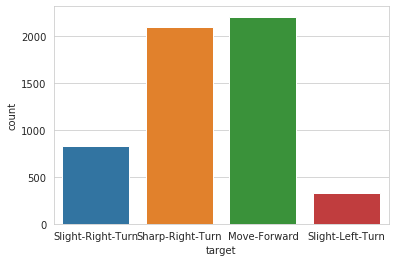

In [9]:
sns.countplot(df.target, label="Count")


Observamos que las clases estan desvalanceadas y los datos son pocos para la clases de  Slight-Right-turn y Slight-Left_turn.

Revisamos si hay datos nulos

In [10]:
df.isnull().sum()

sd_front    0
sd_left     0
sd_right    0
sd_back     0
target      0
dtype: int64

In [11]:
df.isna().sum()

sd_front    0
sd_left     0
sd_right    0
sd_back     0
target      0
dtype: int64

No hay datos nulos ni NAN

Como es serie de tiempo lo vamos a ver como datos que dependen del tiempo

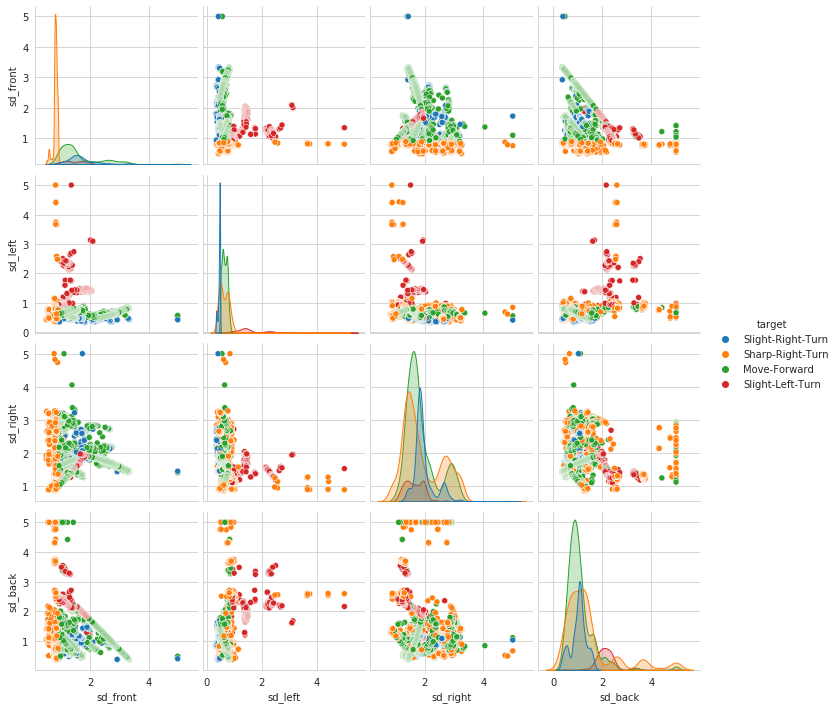

In [12]:
sns.pairplot(df, hue='target', vars=[
             "sd_front", "sd_left", "sd_right", "sd_back"])


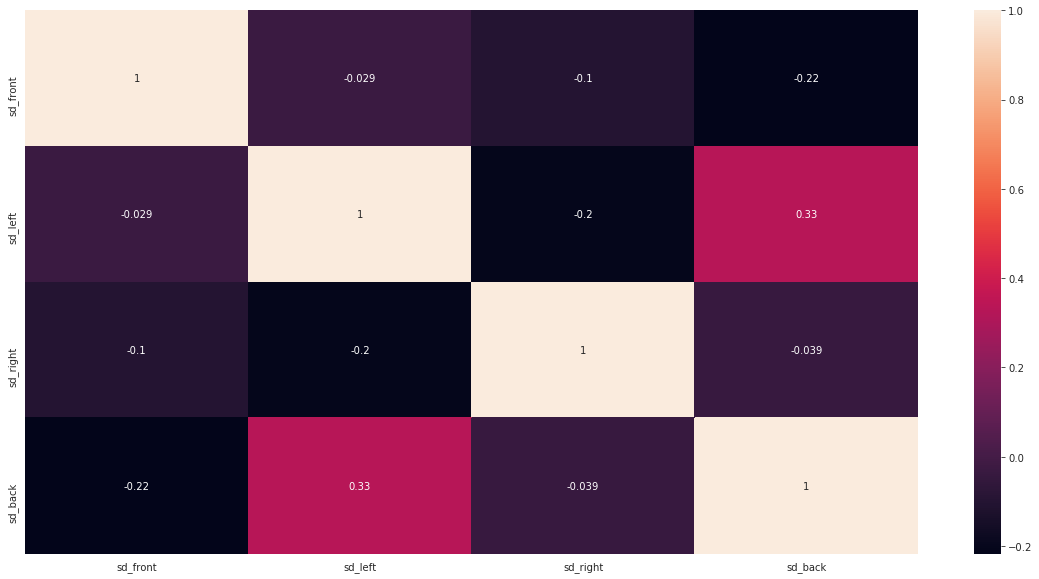

In [13]:
# Let's check the correlation between the variables
# 
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)


## Matriz de correlación, se debe prestar atención a
## todo lo que se aleje del cero, mas claros es correlacion positiva, entre mas oscura hay una correlación negativa, se debe analizar con relacion a la variable target, las dos + y -

## Si hay alguna variable que tenga valores cercanos a cero con todas las demas caracteristicas, entonces se omite.


# Crear variables Dummy

In [16]:
temp = pd.get_dummies(df, sparse=True)  # drop_first avoid multi-collinearity
#see https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde


In [84]:
temp.sample(n=15,random_state=789)

,sd_front,sd_left,sd_right,sd_back,target_Move-Forward,target_Sharp-Right-Turn,target_Slight-Left-Turn,target_Slight-Right-Turn
2736,0.821,0.948,1.156,2.410,0,1,0,0
2632,1.558,1.419,1.639,2.065,0,0,1,0
327,0.790,0.769,2.789,1.172,0,1,0,0
2435,0.865,0.500,3.188,1.377,0,1,0,0
4193,1.529,0.751,1.592,0.724,1,0,0,0
1766,0.782,0.779,1.326,3.622,0,1,0,0
4058,0.767,0.475,1.780,1.112,0,1,0,0
2087,0.989,0.685,2.294,1.991,1,0,0,0
672,3.335,0.425,1.421,0.368,0,0,0,1
2114,0.976,0.736,2.911,5.000,1,0,0,0


In [22]:
# Contamos las ocurrencias de la ultima columna para ver si vale la pena que este ahí
# temp.select_dtypes
# sns.countplot(temp  df.target, label="Count")
temp.shape

(5456, 8)

In [25]:
temp.dtypes

sd_front                             float64
sd_left                              float64
sd_right                             float64
sd_back                              float64
target_Move-Forward         Sparse[uint8, 0]
target_Sharp-Right-Turn     Sparse[uint8, 0]
target_Slight-Left-Turn     Sparse[uint8, 0]
target_Slight-Right-Turn    Sparse[uint8, 0]
dtype: object

In [30]:
temp.count()

sd_front                    5456
sd_left                     5456
sd_right                    5456
sd_back                     5456
target_Move-Forward         5456
target_Sharp-Right-Turn     5456
target_Slight-Left-Turn     5456
target_Slight-Right-Turn    5456
dtype: int64

In [ ]:
temp.value_counts()

In [68]:
temp[temp['target_Slight-Right-Turn'] == 1]


,sd_front,sd_left,sd_right,sd_back,target_Move-Forward,target_Sharp-Right-Turn,target_Slight-Left-Turn,target_Slight-Right-Turn
0,1.687,0.445,2.332,0.429,0,0,0,1
1,1.687,0.449,2.332,0.429,0,0,0,1
2,1.687,0.449,2.334,0.429,0,0,0,1
3,1.687,0.449,2.334,0.429,0,0,0,1
4,1.687,0.449,2.334,0.429,0,0,0,1
...,...,...,...,...,...,...,...,...
5028,1.501,0.492,1.816,1.280,0,0,0,1
5029,1.491,0.494,1.813,1.289,0,0,0,1
5215,3.300,0.468,1.442,0.415,0,0,0,1
5216,3.301,0.470,1.443,0.413,0,0,0,1


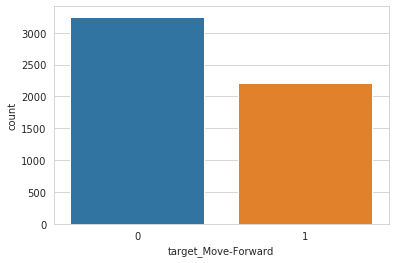

In [82]:
# sns.countplot('target_Slight-Right-Turn',data=temp)
sns.countplot(x='target_Move-Forward',data=temp)


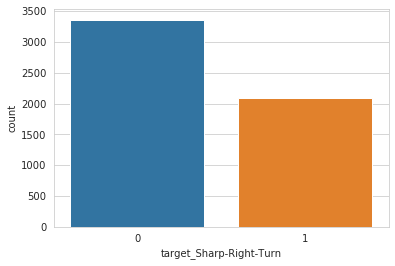

In [74]:
sns.countplot(x='target_Sharp-Right-Turn', data=temp)


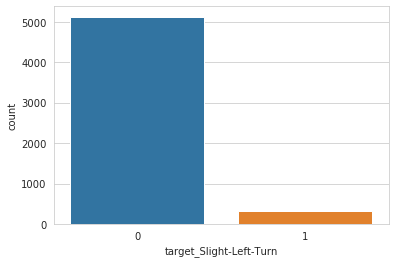

In [76]:
sns.countplot(x='target_Slight-Left-Turn', data=temp)


In [92]:
temp[temp['target_Slight-Left-Turn'] == 1].count()


sd_front                    328
sd_left                     328
sd_right                    328
sd_back                     328
target_Move-Forward         328
target_Sharp-Right-Turn     328
target_Slight-Left-Turn     328
target_Slight-Right-Turn    328
dtype: int64

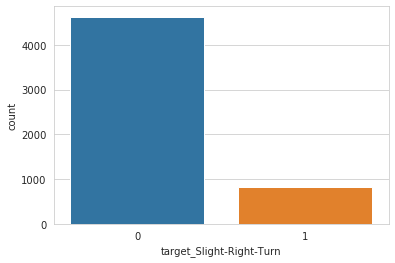

In [80]:
sns.countplot(x='target_Slight-Right-Turn', data=temp)

> Como se observa el número de instancias con etiqueta de 1 donde la variable categorica (dummys) es mínima, es la columna `target_Slight-Left-Turn`, por este motivo se prefiere eliminar esta columna. Sin embargo, en principio, no importa cual sea la columna que se elimina.  

Se considera mejor quitar la de menos ocurrencias, pero observese que aqui no importa, dado que se quiere predecir en una primera instancia solo si el modelo puede clasificar una sola caracteristica, esta es `target_Move-Forward',data=temp)`. 

In [ ]:
# remove the column
del temp['target_Slight-Left-Turn']

In [102]:
temp.head()

,sd_front,sd_left,sd_right,sd_back,target_Move-Forward,target_Sharp-Right-Turn,target_Slight-Right-Turn
0,1.687,0.445,2.332,0.429,0,0,1
1,1.687,0.449,2.332,0.429,0,0,1
2,1.687,0.449,2.334,0.429,0,0,1
3,1.687,0.449,2.334,0.429,0,0,1
4,1.687,0.449,2.334,0.429,0,0,1


In [108]:
# Guardar dataframe
#temp.to_csv('Data/robot_wall_follower/wall_robot_01.csv', header=True, index=False)
